In [1]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import fetch_species_distributions, load_digits
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import KFold 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import decomposition
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import fetch_species_distributions, load_digits
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import KFold 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsIC
from sklearn.preprocessing import MinMaxScaler

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data_AP.csv",dtype={'Symbol': np.str},parse_dates=['Accper'])
tier25=data.iloc[:,-1].quantile(0.25)
tier75=data.iloc[:,-1].quantile(0.75)
data['classification']=0


for i in range(0,len(data.iloc[:,-1])):
    if (data.iloc[i,-2]<=tier25):
        data.iloc[i,-1]=-1
    elif (data.iloc[i,-2]>=tier75):
        data.iloc[i,-1]=1
    else:
        data.iloc[i,-1]=0

        
        
        
data
data['classification']=data['classification'].astype(int)
feature_global=data.iloc[:,2:-2]
response_global=data.iloc[:,-2]
response_global=response_global.values.reshape(-1,1)
response_global_class=data.iloc[:,-1]
#standard
X_tool = StandardScaler()
y_tool = StandardScaler()
x_std = X_tool.fit_transform(feature_global)
y_std = y_tool.fit_transform(response_global)
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.25)
x_train_class,x_test_class,y_train_class,y_test_class = train_test_split(x_std,response_global_class,test_size=0.25)

C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_13220\1325665192.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.read_csv("data_AP.csv",dtype={'Symbol': np.str},parse_dates=['Accper'])


## PCA

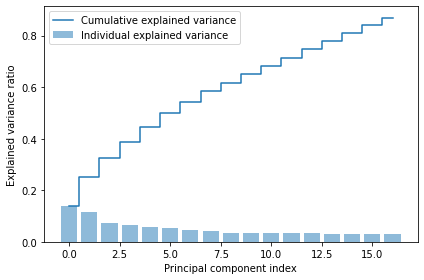

<Figure size 432x288 with 0 Axes>

In [3]:
x=x_std
pca = PCA(n_components=0.85)
#='mle'
x_pca = pca.fit_transform(x)
#     x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_std_pca,y_std,test_size=0.2)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig("pca_importance.png")
x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_pca,response_global_class,test_size=0.1)


Here is the tuning for SVM
Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter
current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_22488\989502528.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


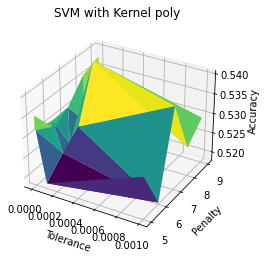

current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_22488\989502528.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


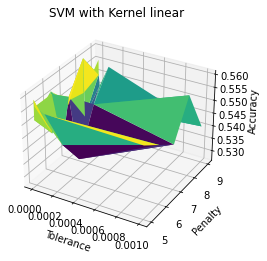

current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_22488\989502528.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


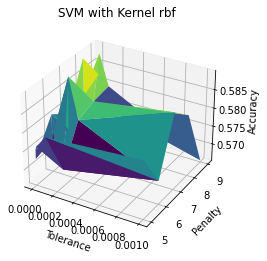

The best hyper-parameter of SVM is: KERNEL = rbf,  Tolerance = 1e-07, and Penalty = 8.0
The corresponding accuracy in tunning for svm is 0.5896535458967301
The corresponding accuracy in prediction for SVM is 0.6140015302218822


In [11]:
kfolds = KFold(n_splits=3,  shuffle=True)
x_train_1,x_train_2,y_train_1,y_train_2=train_test_split(x_train_pca,y_train,test_size=0.05)
x=x_train_2
y=y_train_2
# Tune for SVM
print("Here is the tuning for SVM")
print("Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter")

Kernel=['poly','linear','rbf']
Tol=[10e-4,10e-5,10e-6,10e-7,10e-8]
c=np.linspace(start = 5, stop = 9, num = 5)
Acc=0
##################

for j in range(0,3):
    count=0
    p3d = pd.DataFrame(columns=['Param 1','Param 2','Response Value']) 
    for k in range(0,5):
        for m in range(0,5):
            SVM=OneVsRestClassifier(svm.SVC(kernel=Kernel[j],tol=Tol[k],C=c[m]))
            scores = cross_val_score(SVM,x, y, scoring='accuracy', cv=kfolds, n_jobs=-1)
            #############
            p3d.loc[count]=[Tol[k],c[m],scores.mean()]
            count=count+1
            print("current iteration is "+str(count))
            ###################
            if (scores.mean()>Acc):
                Acc=scores.mean()
                KERNEL=Kernel[j]
                Tolerance=Tol[k]
                Penalty=c[m]


    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(p3d['Param 1'], p3d['Param 2'], p3d['Response Value'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.set_xlabel('Tolerance')
    ax.set_ylabel('Penalty')
    ax.set_zlabel('Accuracy')
    ax.set_title("SVM with Kernel "+Kernel[j])
    plt.show()


print("The best hyper-parameter of SVM is: KERNEL = "+KERNEL+",  Tolerance = "+str(Tolerance)+", and Penalty = "+str(Penalty))
print("The corresponding accuracy in tunning for svm is "+str(Acc))


SVM_pred = OneVsRestClassifier(svm.SVC(kernel=KERNEL,tol=Tolerance,C=Penalty))
SVM_pred.fit(x_train_2,y_train_2)
Acc_pred=SVM_pred.score(x_test_pca,y_test)
print("The corresponding accuracy in prediction for SVM is "+str(Acc_pred))
y_pred_SVM=SVM_pred.predict(x_test_pca)

## LASSO

C:\Users\JanRuoYu\.conda\envs\py39\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\JanRuoYu\.conda\envs\py39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

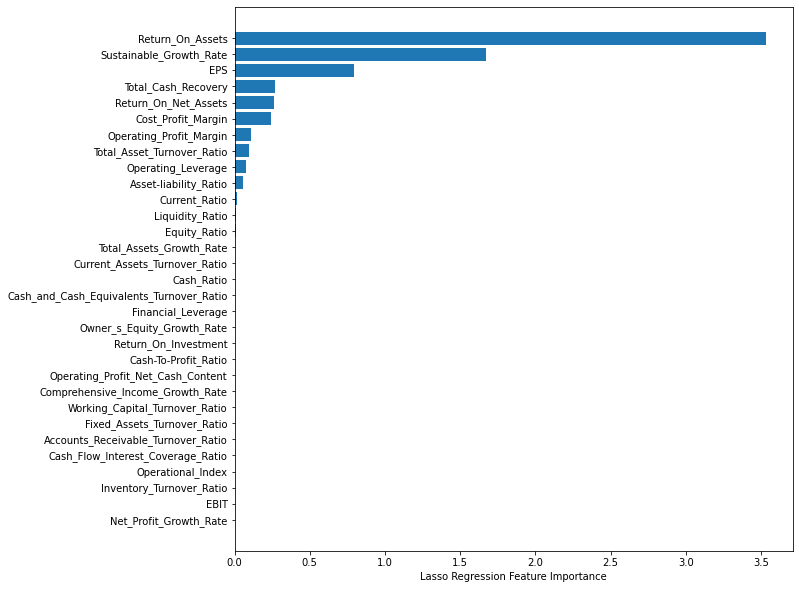

In [6]:
x=feature_global
y=response_global
###lasso regression based on AIC
lasso_aic = LassoLarsIC(criterion='aic', max_iter=50000)
lasso_aic.fit(x,y)
#ranks['Lasso_AIC'] = rank_to_dict(np.abs(lasso_aic.coef_), names)
###lasso regression based on BIC
lasso_bic = LassoLarsIC(criterion='bic', max_iter=50000)
lasso_bic.fit(x,y)
#ranks['Lasso_BIC'] = rank_to_dict(np.abs(lasso_bic.coef_), names)

bic = np.abs(lasso_bic.coef_)
aic = np.abs(lasso_aic.coef_)
mean = 1/2*(aic+bic)

Lasso = pd.DataFrame({"Var_bic": ["X%s" % (i+1) for i in range(len(bic))],
                      "Var_aic": ["X%s" % (i+1) for i in range(len(aic))],
                   'Name': data.columns[2:-2],
                   "Importance_bic": bic,
                   "Importance_aic": aic,
                     "Importance_mean": mean})
Lasso["rank"] = Lasso["Importance_mean"].rank(ascending=False)
Lasso = Lasso.sort_values(by="Importance_mean", ascending=True)
Lasso.reset_index(drop=True, inplace=True)
Lasso.to_csv("importance_lasso.csv", index=False)
plt.figure(figsize=(10,10))
plt.barh(Lasso.iloc[:,2],Lasso.iloc[:,5])
plt.xlabel("Lasso Regression Feature Importance")
plt.savefig("Lasso_importance.png")

feature_after_tuned=feature_global[Lasso[Lasso["rank"] <= 18].Name]

#select 20 important features after reduction
x_train,x_test,y_train,y_test = train_test_split(feature_after_tuned,response_global_class,test_size=0.2)

Here is the tuning for SVM
Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter
current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_22488\2505268662.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


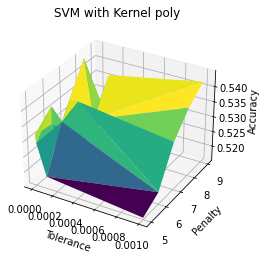

current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_22488\2505268662.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


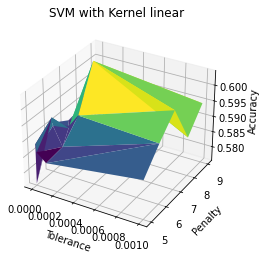

current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_22488\2505268662.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


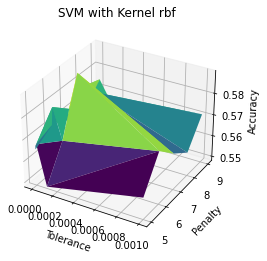

The best hyper-parameter of SVM is: KERNEL = linear,  Tolerance = 0.0001, and Penalty = 8.0
The corresponding accuracy in tunning for svm is 0.6540530716103236
The corresponding accuracy in prediction for SVM is 0.6479342004590666


In [9]:
kfolds = KFold(n_splits=3,  shuffle=True)
x_train,x_test,y_train,y_test = train_test_split(feature_after_tuned,response_global_class,test_size=0.1)
x_train_1,x_train_2,y_train_1,y_train_2=train_test_split(x_train,y_train,test_size=0.05)
x=x_train_2
y=y_train_2
# Tune for SVM
print("Here is the tuning for SVM")
print("Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter")
feature_after_tuned

Kernel=['poly','linear','rbf']
Tol=[10e-4,10e-5,10e-6,10e-7,10e-8]
c=np.linspace(start = 5, stop = 9, num = 5)
Acc=0
##################

for j in range(0,3):
    count=0
    p3d = pd.DataFrame(columns=['Param 1','Param 2','Response Value']) 
    for k in range(0,5):
        for m in range(0,5):
            SVM=OneVsRestClassifier(svm.SVC(kernel=Kernel[j],tol=Tol[k],C=c[m]))
            scores = cross_val_score(SVM,x, y, scoring='accuracy', cv=kfolds, n_jobs=-1)
            #############
            p3d.loc[count]=[Tol[k],c[m],scores.mean()]
            count=count+1
            print("current iteration is "+str(count))
            ###################
            if (scores.mean()>Acc):
                Acc=scores.mean()
                KERNEL=Kernel[j]
                Tolerance=Tol[k]
                Penalty=c[m]


    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(p3d['Param 1'], p3d['Param 2'], p3d['Response Value'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.set_xlabel('Tolerance')
    ax.set_ylabel('Penalty')
    ax.set_zlabel('Accuracy')
    ax.set_title("SVM with Kernel "+Kernel[j])
    plt.show()


print("The best hyper-parameter of SVM is: KERNEL = "+KERNEL+",  Tolerance = "+str(Tolerance)+", and Penalty = "+str(Penalty))
print("The corresponding accuracy in tunning for svm is "+str(Acc))


SVM_pred = OneVsRestClassifier(svm.SVC(kernel=KERNEL,tol=Tolerance,C=Penalty))
SVM_pred.fit(x_train_2,y_train_2)
Acc_pred=SVM_pred.score(x_test,y_test)
print("The corresponding accuracy in prediction for SVM is "+str(Acc_pred))
y_pred_SVM=SVM_pred.predict(x_test)

## RF

C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_25068\694248486.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x, y)


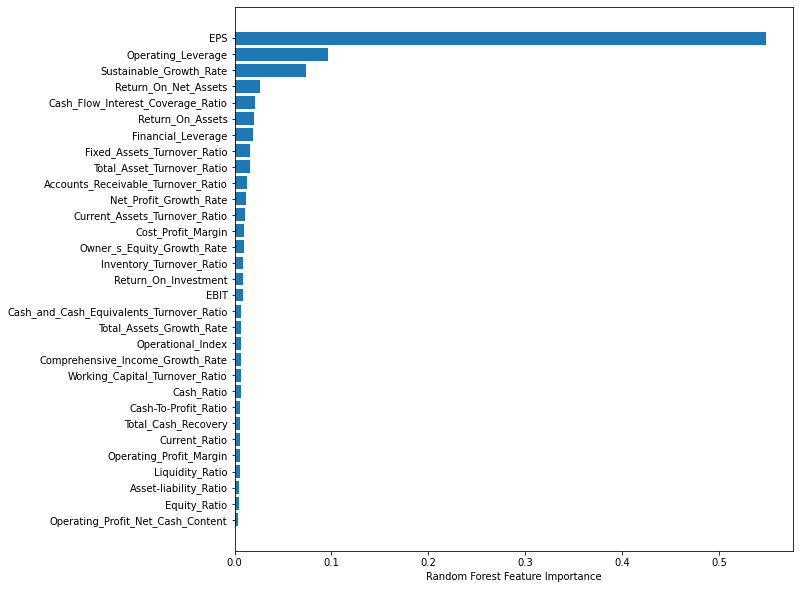

In [4]:
x=feature_global
y=response_global
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rf.fit(x, y)
im = rf.feature_importances_
FS = pd.DataFrame({"Var": ["X%s" % (i+1) for i in range(len(im))],
               'Name': data.columns[2:-2],
               "Importance": im})
FS["rank"] = FS["Importance"].rank(ascending=False)
FS = FS.sort_values(by="Importance", ascending=True)
FS.reset_index(drop=True, inplace=True)
FS.to_csv("importance_rf.csv", index=False)

plt.figure(figsize=(10,10))
plt.barh(FS.iloc[:,1],FS.iloc[:,2])
plt.xlabel("Random Forest Feature Importance")
plt.savefig("rf_importance.png")

feature_after_tuned=feature_global[FS[FS["rank"] <= 18].Name]
#     scaler = StandardScaler()
#     scaler.fit(feature_after_tuned)
#     feature_std = scaler.transform(feature_after_tuned)
#     feature_std=pd.DataFrame(feature_std,columns=feature_after_tuned.columns)

#select 20 important features after reduction


Here is the tuning for SVM
Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter
current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_13220\3886470656.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


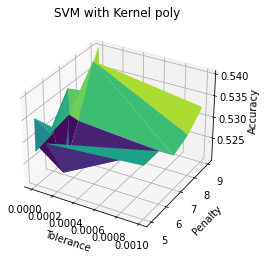

current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_13220\3886470656.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


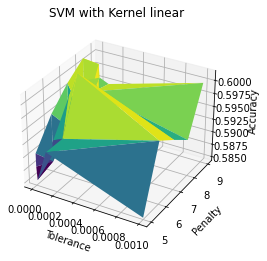

current iteration is 1
current iteration is 2
current iteration is 3
current iteration is 4
current iteration is 5
current iteration is 6
current iteration is 7
current iteration is 8
current iteration is 9
current iteration is 10
current iteration is 11
current iteration is 12
current iteration is 13
current iteration is 14
current iteration is 15
current iteration is 16
current iteration is 17
current iteration is 18
current iteration is 19
current iteration is 20
current iteration is 21
current iteration is 22
current iteration is 23
current iteration is 24
current iteration is 25


C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_13220\3886470656.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


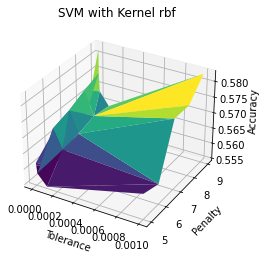

The best hyper-parameter of SVM is: KERNEL = linear,  Tolerance = 1e-07, and Penalty = 8.0
The corresponding accuracy in tunning for svm is 0.6015434547421565
The corresponding accuracy in prediction for SVM is 0.5956388676358072


In [7]:
kfolds = KFold(n_splits=5,  shuffle=True)
x_train,x_test,y_train,y_test = train_test_split(feature_after_tuned,response_global_class,test_size=0.1)
x_train_1,x_train_2,y_train_1,y_train_2=train_test_split(x_train,y_train,test_size=0.05)
x=x_train_2
y=y_train_2
# Tune for SVM
print("Here is the tuning for SVM")
print("Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter")
feature_after_tuned

Kernel=['poly','linear','rbf']
Tol=[10e-4,10e-5,10e-6,10e-7,10e-8]
c=np.linspace(start = 5, stop = 9, num = 5)
Acc=0
##################

for j in range(0,3):
    count=0
    p3d = pd.DataFrame(columns=['Param 1','Param 2','Response Value']) 
    for k in range(0,5):
        for m in range(0,5):
            SVM=OneVsRestClassifier(svm.SVC(kernel=Kernel[j],tol=Tol[k],C=c[m]))
            scores = cross_val_score(SVM,x, y, scoring='accuracy', cv=kfolds, n_jobs=-1)
            #############
            p3d.loc[count]=[Tol[k],c[m],scores.mean()]
            count=count+1
            print("current iteration is "+str(count))
            ###################
            if (scores.mean()>Acc):
                Acc=scores.mean()
                KERNEL=Kernel[j]
                Tolerance=Tol[k]
                Penalty=c[m]


    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(p3d['Param 1'], p3d['Param 2'], p3d['Response Value'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.set_xlabel('Tolerance')
    ax.set_ylabel('Penalty')
    ax.set_zlabel('Accuracy')
    ax.set_title("SVM with Kernel "+Kernel[j])
    plt.show()


print("The best hyper-parameter of SVM is: KERNEL = "+KERNEL+",  Tolerance = "+str(Tolerance)+", and Penalty = "+str(Penalty))
print("The corresponding accuracy in tunning for svm is "+str(Acc))


SVM_pred = OneVsRestClassifier(svm.SVC(kernel=KERNEL,tol=Tolerance,C=Penalty))
SVM_pred.fit(x_train_2,y_train_2)
Acc_pred=SVM_pred.score(x_test,y_test)
print("The corresponding accuracy in prediction for SVM is "+str(Acc_pred))
y_pred_SVM=SVM_pred.predict(x_test)